In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import math

In [13]:
path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\AD0"
path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\DementiaMRI\Data\Pre-processed-AD"
brains = []
for file_name in os.listdir(path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(path, file_name)
        img = nib.load(file_path)
        data = img.get_fdata()
        brains.append(data)


        print(file_name[0:10], end="|")
        if len(brains) > 1:
            break


brains = np.array(brains)

106_ADNI_1|107_ADNI_1|

In [21]:
from ...Data.load import load
H_train3D, H_test3D = load(dataset_name="Pre-processed-CN", train_test_split=0.8, take=1)

ImportError: attempted relative import with no known parent package

In [16]:
H_train2D.shape

(8, 80, 96)

In [12]:
s={}
for i in range(len(brains)):
    s[np.array(brains[i]).shape] = []
s

{(240, 256, 160): [], (256, 256, 170): [], (256, 256, 166): []}

112_sub-AD|

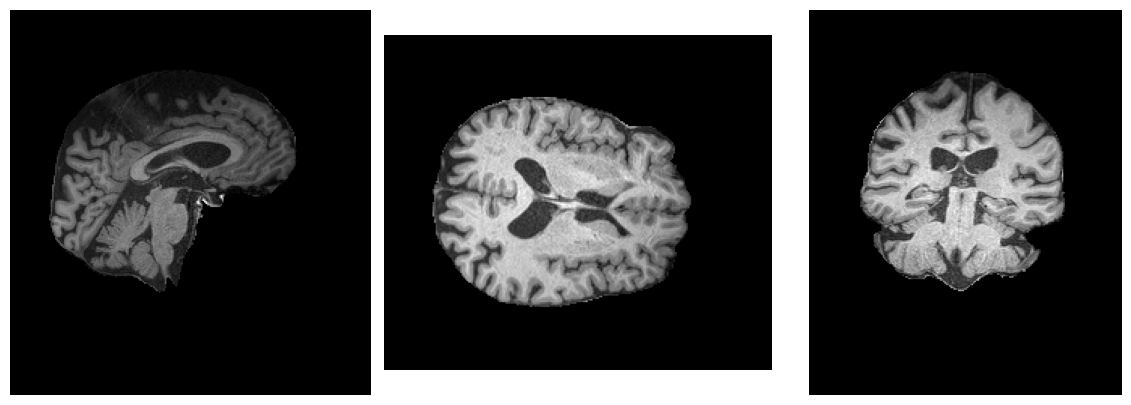

In [29]:
path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MIXED2"
brains = []
for file_name in os.listdir(path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(path, file_name)
        img = nib.load(file_path)
        data = img.get_fdata()
        brains.append(data)


        print(file_name[0:10], end="|")
        if len(brains) > 0:
            break


brains = np.array(brains)


lateral_index = brains.shape[1] // 2
top_down_index = int(brains.shape[3] * 0.6)
front_index = int(brains.shape[2] * 0.4)

mean_lateral = np.mean(brains[:, lateral_index, :, :], axis=0)
mean_top_down = np.mean(brains[:, :, :, top_down_index], axis=0)
mean_front = np.mean(brains[:, :, front_index, :], axis=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mean_lateral.T, cmap='gray', origin="lower")
#axes[0].set_title("Lateral View (Sagittal)")
axes[0].axis('off')

axes[1].imshow(mean_top_down, cmap='gray')
#axes[1].set_title("Top-Down View (Axial)")
axes[1].axis('off')

axes[2].imshow(mean_front.T, cmap='gray', origin="lower")
#axes[2].set_title("Front View (Coronal)")
axes[2].axis('off')

#plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

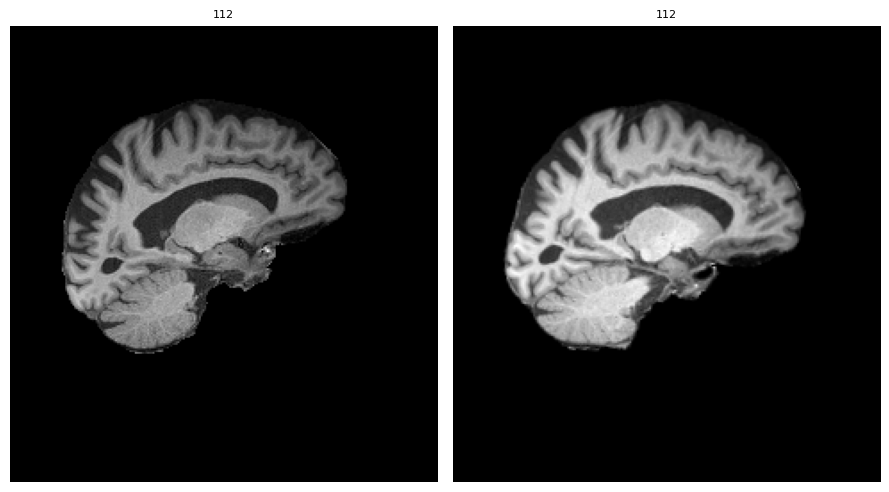

In [49]:
# Define the folder containing the NIfTI files
folder_path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\Data\prepross_208"
folder_path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MIXED2"

# Function to plot the middle slices of images between n1 and n2 in a single figure
def plot_middle_slices_in_range(folder_path, n1, n2, axis=1):
    # Get a sorted list of all files in the directory excluding mask files
    all_files = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.nii.gz') and not f.endswith('_mask.nii.gz')]
    )
    
    # Filter files between n1 and n2
    selected_files = all_files[n1:n2]
    num_images = len(selected_files)
    
    # Determine grid size for the plot
    cols = math.ceil(math.sqrt(num_images))  # Number of columns in the grid
    rows = math.ceil(num_images / cols)  # Number of rows in the grid
    
    # Create a figure for plotting
    fig, axes = plt.subplots(rows, cols, figsize=(9, 9))
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    for i, file in enumerate(selected_files):
        file_path = os.path.join(folder_path, file)
        
        # Load the NIfTI file
        img = nib.load(file_path)
        img_data = img.get_fdata()
        
        # Calculate the middle index along axis 0
        middle_index = img_data.shape[axis] // 2
        
        # Plot the middle slice on the current axis
        axes[i].imshow(img_data[middle_index, :, :].T, cmap='gray', origin="lower")
        axes[i].set_title(file_path.split("\\")[-1].split("_")[0], fontsize=8)
        axes[i].axis('off')
    
    # Hide unused axes if the grid is larger than the number of images
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_middle_slices_in_range(folder_path, 0, 2, 1)

In [57]:
from glob import glob
import numpy as np
import nibabel as nib
from tqdm import tqdm
from scipy.ndimage import zoom
import os
from tensorflow.keras import utils

def plot_average_brain(path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\AD0", take=100, target_shape=(256, 256, 170), figsize=(6, 2)):
    # Load all brains in folder path
    brains = []
    for file_name in os.listdir(path):
        if file_name.endswith('.nii.gz'):
            file_path = os.path.join(path, file_name)
            img = nib.load(file_path)
            data = img.get_fdata()
            brains.append(data)

            print(file_name[0:10], end="|")
            if len(brains) > take:
                break

    # Images are of different shape, so we resize to convert to a numpy array
    resized_brains = [zoom(brain, 
                        (target_shape[0] / brain.shape[0], 
                            target_shape[1] / brain.shape[1], 
                            target_shape[2] / brain.shape[2]))
                    for brain in brains[:take]]
    brains = np.array(resized_brains)

    lateral_index = brains.shape[1] // 2
    top_down_index = int(brains.shape[3] * 0.6)
    front_index = int(brains.shape[2] * 0.4)

    mean_lateral = np.mean(brains[:, lateral_index, :, :], axis=0)
    mean_top_down = np.mean(brains[:, :, :, top_down_index], axis=0)
    mean_front = np.mean(brains[:, :, front_index, :], axis=0)

    fig, axes = plt.subplots(1, 3, figsize=figsize)
    axes[0].imshow(mean_lateral.T, cmap='gray', origin="lower")
    axes[0].set_title("Lateral View (Sagittal)")
    axes[0].axis('off')

    axes[1].imshow(mean_top_down, cmap='gray')
    axes[1].set_title("Top-Down View (Axial)")
    axes[1].axis('off')

    axes[2].imshow(mean_front.T, cmap='gray', origin="lower")
    axes[2].set_title("Front View (Coronal)")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()
    return mean_lateral.T, mean_top_down, mean_front.T

H_mean_lateral, H_mean_top_down, H_mean_front = plot_average_brain(
    path=r"C:\Users\kiran\Documents\_UIS\sem6\BACH\DementiaMRI\Data\Pre-processed-CN", take=0, target_shape=(104, 120, 128), figsize=(6,2))

1000_sub-A|

IndexError: tuple index out of range